<a href="https://colab.research.google.com/github/Ahdfrmnx/Sentiment-Analysis-With-Keywords-Matching/blob/main/Skripsi_Ahmad_Firman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis Sentimen Terhadap Ulasan Pengguna Aplikasi BRILink Menggunakan Algoritma Random Forest**

**Nama  : Ahmad Firman Ari Yanto**

**NIM   : 2130903065**

#Scraping Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Instalasi modul untuk scraping data dari playstore
!pip install google-play-scraper

In [ ]:
#Import library app google play scraper
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#Import review dan sorting dari playstore scraper
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
    'id.co.bri.brilinkmobile', #Link review aplikasi BRILink Di Playstore
    lang='id', #Bahasa = Indonesia
    country='id', #Negara = Indonesia
    sort=Sort.MOST_RELEVANT, #Mengurutkan bersasarkan Relevansi
    count=29999, #Jumlah data yang akan di Scrape
    filter_score_with=None
)

In [ ]:
data = pd.DataFrame(np.array(result), columns=['review']) #Mengambil kolom review
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head(8) #Menampilkan data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,de29af78-fe9d-4f43-bbf3-eee70bd88d8a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong untuk update versi terbaru untuk pembay...,4,11,2.38.0,2024-12-11 04:42:16,None,None,2.38.0
1,8693bf0d-866b-48b3-900e-79dd0d1e8614,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"1.Terlalu banyak error jadi tidak efisien, Unt...",2,1,2.40.0,2025-02-06 06:30:40,None,None,2.40.0
2,f20852da-724a-433a-987f-1ca16c760d12,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Versi 1.31 untuk agen terbilang merpotkan dmn ...,3,12,2.38.0,2024-12-15 04:54:35,None,None,2.38.0
3,6080a0b4-4956-4971-bbe2-3782d57bc005,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pertama ubah sistem pin aja lebih nyaman, kedu...",3,3,2.39.0,2025-01-24 13:37:11,None,None,2.39.0
4,fac41d63-bf37-47a1-9f65-7c6a44998e0b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Semua memudahkan dan lebih cepet cuma Tolong d...,4,7,2.39.0,2025-01-08 22:23:16,None,None,2.39.0
5,72728415-f30a-483c-b9d0-e6a029f4a1dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apa-apaan ini?? FeeBRILink ko masuknya satu-sa...,1,36,2.39.0,2025-01-16 13:44:11,None,None,2.39.0
6,e3cc8661-085d-45a7-b706-59a2fa06e1bb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Brilink mobile saat ini sudah mendekati kompli...,5,128,2.36.0,2024-10-29 05:17:42,None,None,2.36.0
7,6186bd58-247e-4c95-ba17-76997772ac65,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Menurut saya mobile Brilinknya cukup lengkap u...,5,11,2.40.0,2025-02-07 17:10:41,None,None,2.40.0


In [ ]:
len(data.index) #Jumlah Data Yang Diperoleh

10528

In [ ]:
#Hanya mengambil 2 kolom yaitu: content, at
sorteddata = data[['content','at']].sort_values(by='at', ascending=False) #Disorting berdasarkan review terbaru
sorteddata.head(8)

,content,at
6672,Oke sangat membantu kelancaran TRX,2025-02-17 05:33:02
9179,BRILINK MOBILE MENAMBAH PENGHASILAN SAYA PerBU...,2025-02-17 03:59:54
6687,keren,2025-02-16 12:51:20
6670,Ribet. Kalau gini terus ga bakal maju,2025-02-16 08:51:26
6685,Mantaf,2025-02-16 08:21:15
6669,"Saya tidak dapat kode otp Saya sudah ulang"" ti...",2025-02-16 07:00:14
6671,Lama bangett pengajuannya,2025-02-16 02:45:22
6668,Baik tapi no pelanggan tidak tersimpan kalau p...,2025-02-16 01:28:55


In [ ]:
sorteddata.info() #Menampilkan informasi sorted data

<class 'pandas.core.frame.DataFrame'>
Index: 10528 entries, 6672 to 9897
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  10528 non-null  object        
 1   at       10528 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 246.8+ KB


In [ ]:
sorteddata['Year'] = sorteddata['at'].dt.year #Memisahkan kolom tahun
sorteddata['Month'] = sorteddata['at'].dt.month #Memisahkan kolom bulan
sorteddata['Day'] = sorteddata['at'].dt.day #Memisahkan kolom hari

df = sorteddata[['content','Year','Month','Day']]
df.head(8) #Menampilkan dataframe

,content,Year,Month,Day
6672,Oke sangat membantu kelancaran TRX,2025,2,17
9179,BRILINK MOBILE MENAMBAH PENGHASILAN SAYA PerBU...,2025,2,17
6687,keren,2025,2,16
6670,Ribet. Kalau gini terus ga bakal maju,2025,2,16
6685,Mantaf,2025,2,16
6669,"Saya tidak dapat kode otp Saya sudah ulang"" ti...",2025,2,16
6671,Lama bangett pengajuannya,2025,2,16
6668,Baik tapi no pelanggan tidak tersimpan kalau p...,2025,2,16


#Preprocessing Data

In [ ]:
#Import Library Pendukung
import string
import nltk
import seaborn as sns
import re

In [ ]:
nltk.download('punkt') #Mengunduh package punkt
nltk.download('stopwords') #Mengunduh package stopword
nltk.download('wordnet') #Mengunduh package wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Cleaning

In [ ]:
#Menghapus URL
df['content'] = df['content'].str.replace('https\S+', ' ', case=False)
#Menghapus Mention
df['content'] = df['content'].str.replace('@\S+', ' ', case=False)
#Menghapus Hastag
df['content'] = df['content'].str.replace('#\S+', ' ', case=False)
#Menghapus Next Karakter
df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)
#Menghapus Tanda Baca
df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)
#Menghapus Spasi
df['content'] = df['content'].str.replace("\s(2)", ' ', case=False)
# Menghapus huruf yang berulang
df['content'] = df['content'].apply(lambda x: re.sub(r'(\w)\1+', r'\1', x))

#Case Folding (Lowercase)

In [ ]:
#Mengubah Semua Teks Ke Huruf Kecil (Lowercase)
df['content'] = df['content'].str.lower()

#Tokenisasi

In [ ]:
#Impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer #import package RegexTokenizer
regexp = RegexpTokenizer('\w+')
df['content_tokenisasi']=df['content'].apply(regexp.tokenize) #menambahkan kolom content_tokenisasi pada dataframe
df.head(5)

,content,Year,Month,Day,content_tokenisasi
6672,oke sangat membantu kelancaran trx,2025,2,17,"[oke, sangat, membantu, kelancaran, trx]"
9179,brilink mobile menambah penghasilan saya perbu...,2025,2,17,"[brilink, mobile, menambah, penghasilan, saya,..."
6687,keren,2025,2,16,[keren]
6670,ribet. kalau gini terus ga bakal maju,2025,2,16,"[ribet, kalau, gini, terus, ga, bakal, maju]"
6685,mantaf,2025,2,16,[mantaf]


#Filtering (Stopwords Removal)

In [ ]:
#Mengunduh package stopword
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Mengimport stopword
from nltk.corpus import stopwords
# membuat daftar stopword dalam bahasa indonesia
stopwords = nltk.corpus.stopwords.words("indonesian")

In [ ]:
#Remove stopwords
df['content_tokenisasi'] = df['content_tokenisasi'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(5)

,content,Year,Month,Day,content_tokenisasi
6672,oke sangat membantu kelancaran trx,2025,2,17,"[oke, membantu, kelancaran, trx]"
9179,brilink mobile menambah penghasilan saya perbu...,2025,2,17,"[brilink, mobile, menambah, penghasilan, perbu..."
6687,keren,2025,2,16,[keren]
6670,ribet. kalau gini terus ga bakal maju,2025,2,16,"[ribet, gini, ga, maju]"
6685,mantaf,2025,2,16,[mantaf]


#Stemming

In [ ]:
#Instal modul sastrawi
!pip install Sastrawi

In [ ]:
#Import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#Proses stemming setiap kata
df['stemmed'] = df['content_tokenisasi'].apply(lambda x: [stemmer.stem(y) for y in x])
#Menampilkan Hasil Stemming
df.head(5)

,content,Year,Month,Day,content_tokenisasi,stemmed
6672,oke sangat membantu kelancaran trx,2025,2,17,"[oke, membantu, kelancaran, trx]","[oke, bantu, lancar, trx]"
9179,brilink mobile menambah penghasilan saya perbu...,2025,2,17,"[brilink, mobile, menambah, penghasilan, perbu...","[brilink, mobile, tambah, hasil, bulan, tolong..."
6687,keren,2025,2,16,[keren],[keren]
6670,ribet. kalau gini terus ga bakal maju,2025,2,16,"[ribet, gini, ga, maju]","[ribet, gin, ga, maju]"
6685,mantaf,2025,2,16,[mantaf],[mantaf]


In [ ]:
#Merubah dari token kedalam bentuk kalimat
df['text_stemmed'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
#Menampilkan Hasil token
df.head(5)

,content,Year,Month,Day,content_tokenisasi,stemmed,text_stemmed
6672,oke sangat membantu kelancaran trx,2025,2,17,"[oke, membantu, kelancaran, trx]","[oke, bantu, lancar, trx]",bantu lancar
9179,brilink mobile menambah penghasilan saya perbu...,2025,2,17,"[brilink, mobile, menambah, penghasilan, perbu...","[brilink, mobile, tambah, hasil, bulan, tolong...",brilink mobile tambah hasil bulan tolong mesin...
6687,keren,2025,2,16,[keren],[keren],keren
6670,ribet. kalau gini terus ga bakal maju,2025,2,16,"[ribet, gini, ga, maju]","[ribet, gin, ga, maju]",ribet maju
6685,mantaf,2025,2,16,[mantaf],[mantaf],mantaf


#Menyimpan Hasil Preprocessing

In [ ]:
#Menghapus column yang kosong
df = df.dropna(subset=['text_stemmed'])
#Menyimpan kedalam format Excel
df.to_excel("Hasil Preprocessing.xlsx", index = False)  #Save to XLSX

#Import Data Yang Telah Di Cleaning

In [ ]:
#Import dataframe excel yang telah terlabeli sentimen
import pandas as pd
df_label = pd.read_excel("Hasil Preprocessing.xlsx")

#Menampilkan Info Dataset
df_label.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10528 entries, 0 to 10527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             10528 non-null  object
 1   Year                10528 non-null  int64 
 2   Month               10528 non-null  int64 
 3   Day                 10528 non-null  int64 
 4   content_tokenisasi  10528 non-null  object
 5   stemmed             10528 non-null  object
 6   text_stemmed        9188 non-null   object
dtypes: int64(3), object(4)
memory usage: 575.9+ KB


#Inset Lexicon Based untuk Melabeli Sentimen

In [ ]:
#Menampilkan Hanya Column Text_Stemmed
df_label=pd.DataFrame(df_label[['text_stemmed']])
df_label.head()

,text_stemmed
0,bantu lancar
1,brilink mobile tambah hasil bulan tolong mesin...
2,keren
3,ribet maju
4,mantaf


In [ ]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/Ahdfrmnx/Sentiment-Analysis-With-Keywords-Matching/refs/heads/main/kamus%20lexicon/positive.tsv"
negative_url = "https://raw.githubusercontent.com/Ahdfrmnx/Sentiment-Analysis-With-Keywords-Matching/refs/heads/main/kamus%20lexicon/negative.tsv"
#url = "https://raw.githubusercontent.com/MohFahmi27/Sentiment-Analysis-for-Bahasa-using-Lexicon-Based-Approach/refs/heads/main/data/datasetAnalysis/lexicon-word-dataset.csv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])
#lexicon_df = pd.read_csv(url)

# Create sets for positive and negative words
#positive_lexicon = set(lexicon_df[lexicon_df['number_of_words'] == 1]['word'])
#negative_lexicon = set(lexicon_df[lexicon_df['number_of_words'] == 2]['word'])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        if sentiment_score > 0:
            sentiment = "Positif"
        else:
            sentiment = "Negatif"

        return sentiment_score, sentiment

    return 0, "Negatif"

# Tentukan sentimen dan skor untuk setiap ulasan
df_label[["Score", "sentiment"]] = df_label["text_stemmed"].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
df_label.head()

,text_stemmed,Score,sentiment
0,bantu lancar,0,Positif
1,brilink mobile tambah hasil bulan tolong mesin...,-1,Negatif
2,keren,0,Positif
3,ribet maju,-1,Negatif
4,mantaf,0,Positif


#TF-IDF (Term Frequency - Inverse Document Frequency)

In [ ]:
#Install library Scikit-Learn
!pip install pandas scikit-learn openpyxl

In [ ]:
#Import dari library Scikit_learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df_klasifikasi=df_label[['text_stemmed','sentiment']].dropna()
#melakukan TF-IDF Verctorizer
X = df_klasifikasi['text_stemmed']
y = df_klasifikasi['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

#Klasifikasi Menggunakan Algoritma Random Forest

Split data "Train_Tes_Split" Data_train = 90%, Data_Testing = 10%

In [ ]:
#Split data "Train_Tes_Split" Data_train = 90%, Data_Testing = 10%
X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size=0.1,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8977149075081611

Split data "Train_Tes_Split" Data_train = 80%, Data_Testing = 20%

In [ ]:
#Split data "Train_Tes_Split" Data_train = 90%, Data_Testing = 10%
X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size=0.2,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.9047878128400435

Split data "Train_Tes_Split" Data_train = 70%, Data_Testing = 30%

In [ ]:
#Split data "Train_Tes_Split" Data_train = 90%, Data_Testing = 10%
X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size=0.3,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.9027928908233587

Split data "Train_Tes_Split" Data_train = 60%, Data_Testing = 40%

In [ ]:
#Split data "Train_Tes_Split" Data_train = 90%, Data_Testing = 10%
X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size=0.4,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8974428726877041

Split data "Train_Tes_Split" Data_train = 50%, Data_Testing = 50%

In [ ]:
#Split data "Train_Tes_Split" Data_train = 90%, Data_Testing = 10%
X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size=0.5,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8950805398345668

#Evaluasi
Convusion Matrix

In [ ]:
#import from sklearn library
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

#Evaluasi Berdasarkan pembagian "Data_train = 90%, Data_Testing = 10%"
#Split data "Train_Tes_Split" Data_train = 90%, Data_Testing = 10%
X_train , X_test , y_train , y_test = train_test_split(X_final , y , test_size=0.2,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

#Function dari Confusion Matrix, Akurasi, pressi, recall dan F1-Score
cm = confusion_matrix(y_test, random_forest_classifier_prediction)
accuracy = accuracy_score(y_test, random_forest_classifier_prediction)
precision = precision_score(y_test, random_forest_classifier_prediction, average='weighted') # Use weighted for multiclass
recall = recall_score(y_test, random_forest_classifier_prediction, average='weighted') # Use weighted for multiclass
f1 = f1_score(y_test, random_forest_classifier_prediction, average='weighted') # Use weighted for multiclass

#Tabel
evaluation_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
}
print("\nMetric Evaluasi :")

evaluation_df = pd.DataFrame(evaluation_data)
print(evaluation_df)

#Tabel confusion matrix
cm_df = pd.DataFrame(cm, index=['Akt.Pos', 'Akt.Neg'], columns=['TP', 'TN'])
print("\nConfusion Matrix:")
cm_df



Metric Evaluasi :
      Metric     Value
0   Accuracy  0.904788
1  Precision  0.902977
2     Recall  0.904788
3   F1-Score  0.903404

Confusion Matrix:


,TP,TN
Akt.Pos,350,106
Akt.Neg,69,1313


#Identifikasi Faktor
Desain Antarmuka Pengguna (UI)

In [ ]:
#Memisahlkan dataframe menjadi dua: positif dan negatif
df_positif = df_label[df_label['sentiment'] == 'Positif']
df_negatif = df_label[df_label['sentiment'] == 'Negatif']

#Fungsi untuk keyword matching
def keyword_matching(df, keywords):
  """
  Mencari kata kunci dalam dataframe dan mengembalikan dataframe baru dengan kolom 'match'.

  Args:
      df: DataFrame yang akan dicari kata kuncinya.
      keywords: Daftar kata kunci yang akan dicari.

  Returns:
      DataFrame baru dengan kolom tambahan 'match' yang menunjukkan apakah kata kunci ditemukan.
  """
  df['match'] = df['text_stemmed'].str.contains('|'.join(keywords), case=False, na=False)
  return df

#Kata Kunci Dalam UI (ganti dengan kata kunci yang sesuai)
keywords = ['ikon', 'navigasi', 'logo', 'menu']

#Lakukan keyword matching untuk data positif dan negatif
df_positif_match = keyword_matching(df_positif, keywords)
df_negatif_match = keyword_matching(df_negatif, keywords)

#Menampilkan hasil
print("Data Positif dengan Keyword Matching:")
print(df_positif_match.head())
print("\nJumlah kolom yang match (Positif):", df_positif_match['match'].sum())

print("\nData Negatif dengan Keyword Matching:")
print(df_negatif_match.head())
print("\nJumlah kolom yang match (Negatif):", df_negatif_match['match'].sum())


Data Positif dengan Keyword Matching:
           text_stemmed  Score sentiment  match
0          bantu lancar      0   Positif  False
2                 keren      0   Positif  False
4                mantaf      0   Positif  False
6    banget pengajuanya      1   Positif  False
8  sayah pdftaran mudah      0   Positif  False

Jumlah kolom yang match (Positif): 248

Data Negatif dengan Keyword Matching:
                                         text_stemmed  Score sentiment  match
1   brilink mobile tambah hasil bulan tolong mesin...     -1   Negatif  False
3                                          ribet maju     -1   Negatif  False
5                          kode ulang masuk biar satu     -2   Negatif  False
7   pelang simpan pelang beli token pulsa ketik ka...     -1   Negatif  False
10                                                NaN      0   Negatif  False

Jumlah kolom yang match (Negatif): 69


#Visualisasi

Wordcloud Sentimen Positif

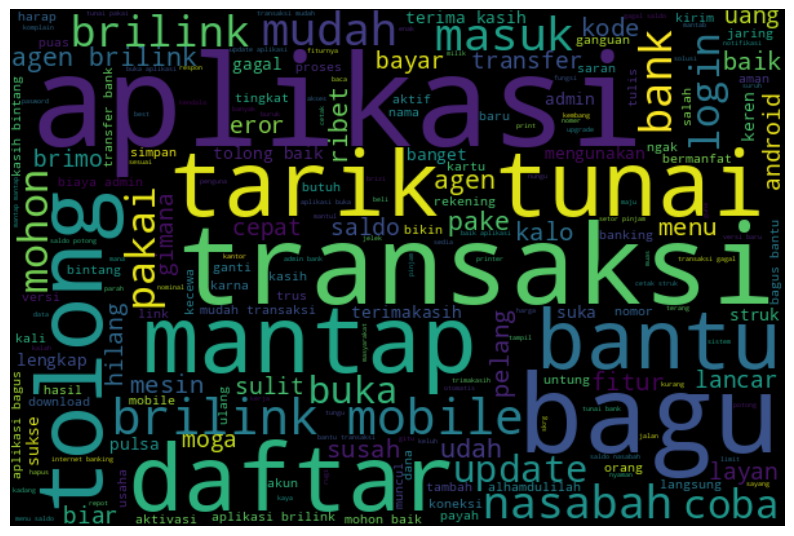

In [ ]:
#Memfilter kolom sentiment = positif
df_p=df[df_label['sentiment']=='Positif']
#Menggabungkan semua isi kolom text_string
all_words_lem = ' '.join([word for word in df_p['text_stemmed']])

#Ploting wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Wordcloud Sentimen Negatif

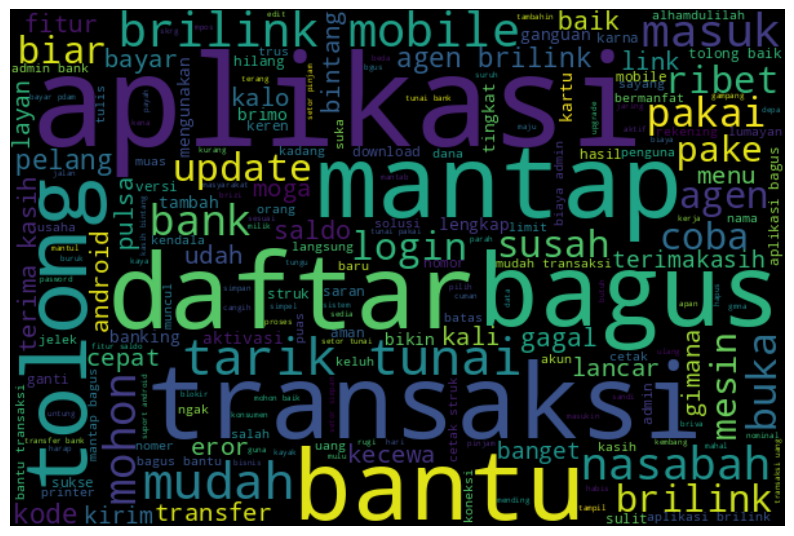

In [ ]:
#Memfilter kolom sentiment = negatif
df_p=df[df_label['sentiment']=='Negatif']
#Menggabungkan semua isi kolom text_string
all_words_lem = ' '.join([word for word in df_p['text_stemmed']])

#Ploting wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Distribusi Sentimen Berdasarkan Plot

In [ ]:
#Jumlah Sentimen Positif & Negatif
df_label['sentiment'].value_counts()

,count
sentiment,
Positif,6920
Negatif,3608


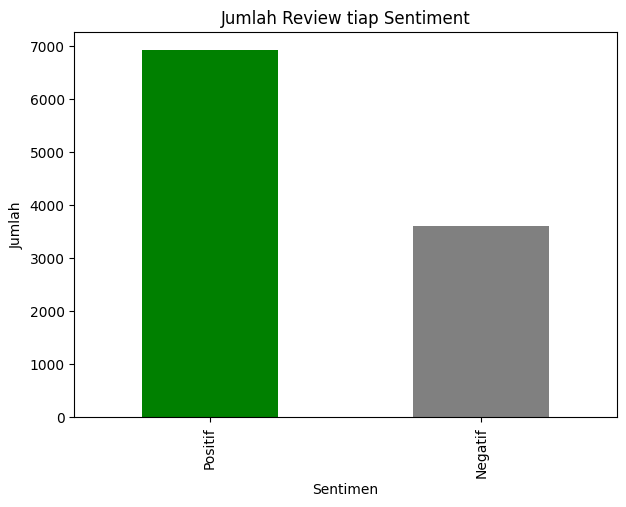

In [ ]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df_label['sentiment'].value_counts().plot(kind='bar',color = color)
plt.title('Jumlah Review tiap Sentiment')
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.grid(False)
plt.show()

Distribusi Sentimen Berdasarkan Pie Chart Percentage

Text(0.5, 1.0, 'Distribusi Sentimen Berdasarkan Percentage')

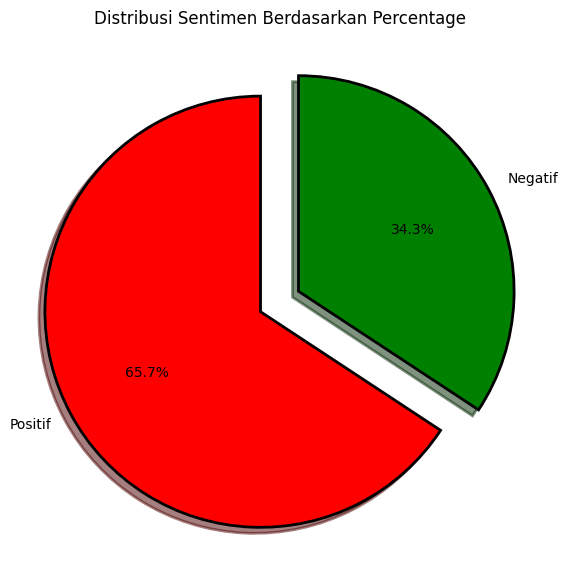

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_label['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribusi Sentimen Berdasarkan Percentage')

Jumlah Sentimen

Akurasi Model Random Forest

In [ ]:
#Inisiasi List Data
data_akurasi = [[90,10,89.77], [80,20,90.47],[70,30,90.27],[60,40,89.74],[50,50,89.50]]

#Membuat pandas DataFrame
df_akurasi = pd.DataFrame(data_akurasi, columns=['data_train', 'data_tes', 'akurasi'])

#Hasil
df_akurasi

,data_train,data_tes,akurasi
0,90,10,89.77
1,80,20,90.47
2,70,30,90.27
3,60,40,89.74
4,50,50,89.50


Akurasi Model Random Forest Dalam Percentage

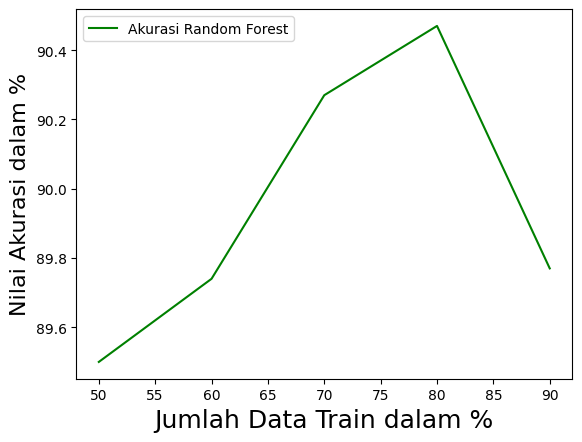

In [ ]:
#Import matplot
import matplotlib.pyplot as plt

plt.plot(df_akurasi['data_train'], df_akurasi['akurasi'], 'g', label='Akurasi Random Forest')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()

Menampilkan Hasil Identifikasi Faktor dalam UI dalam dataframe sentimen positif

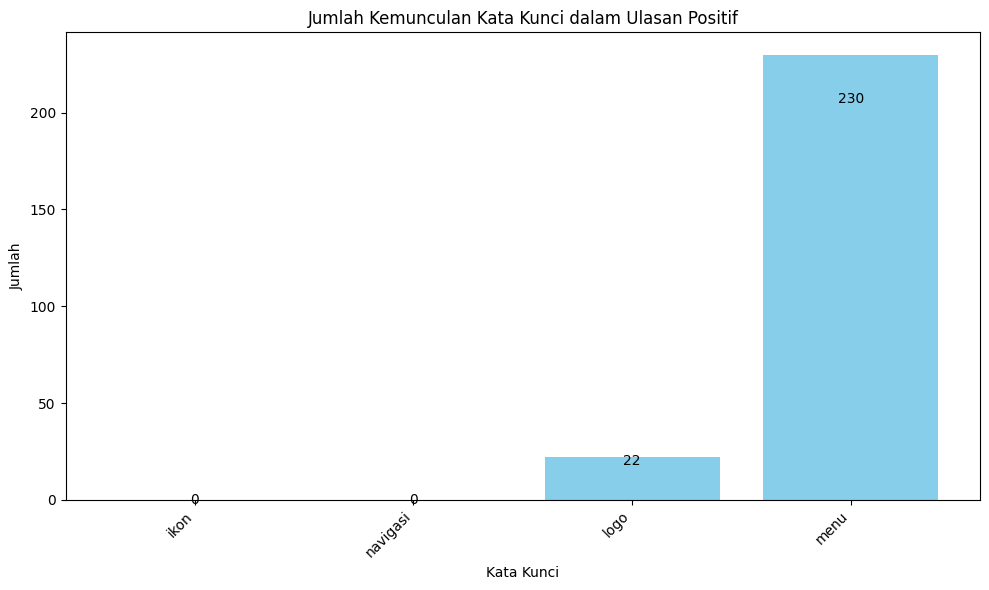

In [ ]:
# prompt: Menampilkan Hasil keywords matching dalam faktor UI pada dataframe sentimen positif
import matplotlib.pyplot as plt
import pandas as pd

# Buat list semua keywords
all_keywords = ['ikon', 'navigasi', 'logo', 'menu']

# Hitung jumlah kemunculan setiap kata kunci
keyword_counts = pd.Series({
    keyword: df_positif_match['text_stemmed'].str.contains(keyword, case=False, na=False).sum()
    for keyword in all_keywords
})

# Buat dictionary untuk menyimpan keyword counts, inisialisasi dengan 0 untuk semua keywords
keyword_counts_dict = {keyword: 0 for keyword in all_keywords}

# Update dictionary dengan keyword counts yang ada
keyword_counts_dict.update(keyword_counts.to_dict())

# Ubah dictionary kembali ke pandas Series
keyword_counts = pd.Series(keyword_counts_dict)

# Buat plot batang
plt.figure(figsize=(10, 6))
bars = plt.bar(keyword_counts.index, keyword_counts.values, color='skyblue')  # Assign the bar plot to a variable

plt.title('Jumlah Kemunculan Kata Kunci dalam Ulasan Positif')
plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tambahkan label jumlah di dalam batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.9 , round(yval), ha='center', va='center')


plt.show()

Menampilkan Hasil Identifikasi Faktor dalam UI dalam dataframe sentimen negatif

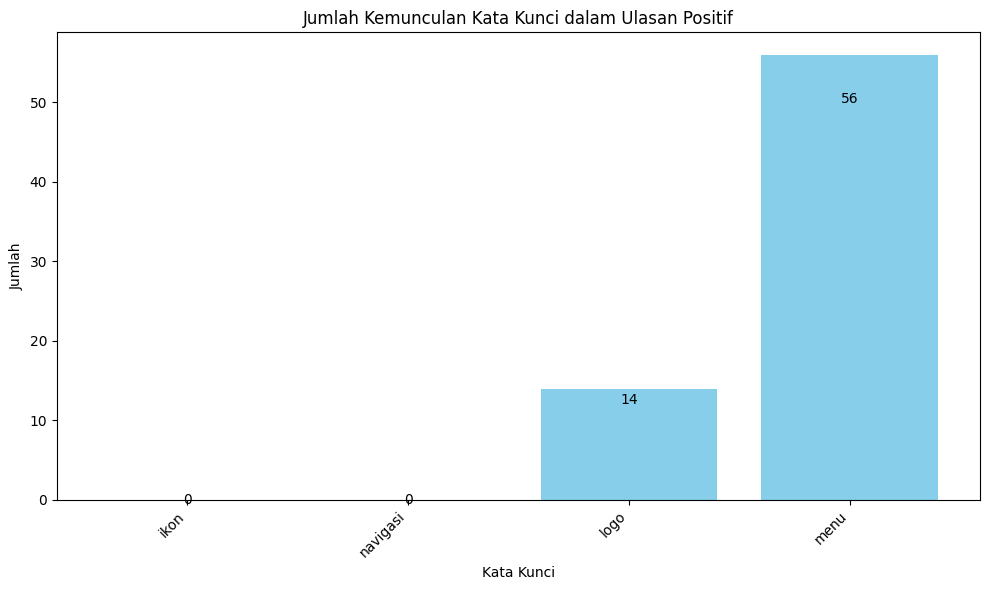

In [ ]:
# prompt: Menampilkan Hasil keywords matching dalam faktor UI pada dataframe sentimen negatif
import matplotlib.pyplot as plt
import pandas as pd

# Buat list semua keywords
all_keywords = ['ikon', 'navigasi', 'logo', 'menu']

# Hitung jumlah kemunculan setiap kata kunci
keyword_counts = pd.Series({
    keyword: df_negatif_match['text_stemmed'].str.contains(keyword, case=False, na=False).sum()
    for keyword in all_keywords
})

# Buat dictionary untuk menyimpan keyword counts, inisialisasi dengan 0 untuk semua keywords
keyword_counts_dict = {keyword: 0 for keyword in all_keywords}

# Update dictionary dengan keyword counts yang ada
keyword_counts_dict.update(keyword_counts.to_dict())

# Ubah dictionary kembali ke pandas Series
keyword_counts = pd.Series(keyword_counts_dict)

# Buat plot batang
plt.figure(figsize=(10, 6))
bars = plt.bar(keyword_counts.index, keyword_counts.values, color='skyblue')  # Assign the bar plot to a variable

plt.title('Jumlah Kemunculan Kata Kunci dalam Ulasan Positif')
plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tambahkan label jumlah di dalam batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.9 , round(yval), ha='center', va='center')


plt.show()